<a href="https://colab.research.google.com/github/t1masavin/my_resume/blob/master/mask_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import time
import imageio
import json
import PIL.Image,PIL.ImageDraw

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files, drive
import json

In [ ]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
def polygons_to_mask(img_shape, polygons):
    mask = np.zeros(img_shape, dtype=np.uint8)
    mask = PIL.Image.fromarray(mask)
    xy = list(map(tuple, polygons))
    PIL.ImageDraw.Draw(mask).polygon(xy=xy, outline=1, fill=1)
    mask = np.array(mask, dtype=bool)
    return mask

In [ ]:
import pandas as pd
import base64

In [ ]:
!pip install segmentation_models

In [ ]:
import segmentation_models as sm

Using TensorFlow backend.


Segmentation Models: using `keras` framework.


In [ ]:
BACKBONE = 'resnext50'
preprocess_input = sm.get_preprocessing(BACKBONE)

model = sm.Unet(BACKBONE)
model.load_weights('/content/drive/My Drive/Colab Notebooks/olymp/LAPLACIAN/50_wight/last_resnext50.h5')
model.compile(
    'Adam',
    loss=sm.losses.bce_jaccard_loss,
    metrics=[sm.metrics.iou_score],
)

# model.compile(
#     'Adam',
#     loss=sm.losses.bce_jaccard_loss,
#     metrics=[sm.metrics.iou_score],
# )

# best_w = keras.callbacks.ModelCheckpoint('/content/drive/My Drive/Colab Notebooks/olymp/best_m1.h5',
#                                 monitor='val_loss',
#                                 verbose=0,
#                                 save_best_only=True,
#                                 save_weights_only=True,
#                                 mode='auto',
#                                 period=1)

# last_w = keras.callbacks.ModelCheckpoint('/content/drive/My Drive/Colab Notebooks/olymp/last_m1.h5',
#                                 monitor='val_loss',
#                                 verbose=0,
#                                 save_best_only=False,
#                                 save_weights_only=True,
#                                 mode='auto',
#                                 period=1)


# callbacks = [best_w, last_w]

94429184/94428600 [==============================] - 7s 0us/step


In [ ]:
dec_cls = {5 : 'staphylococcus_epidermidis', 4 : 'klebsiella_pneumoniae', 
          3 : 'staphylococcus_aureus' , 2 :  'moraxella_catarrhalis' , 
          1 : 'c_kefir', 0 : 'ent_cloacae' }
CLASSES ={'staphylococcus_epidermidis' : np.array([0,0,0,0,0,1]), 'klebsiella_pneumoniae' : np.array([0,0,0,0,1,0]), 
          'staphylococcus_aureus' : np.array([0,0,0,1,0,0]), 'moraxella_catarrhalis' : np.array([0,0,1,0,0,0]), 
          'c_kefir' : np.array([0,1,0,0,0,0]), 'ent_cloacae' : np.array([1,0,0,0,0,0])}

In [ ]:
from PIL import Image
import cv2

In [ ]:
sol_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/olymp/full_cls_images/solution.csv')


for i in range(1,108):
  print(i)
  x_batch = []
  img_name = '/content/drive/My Drive/Colab Notebooks/olymp/test/' + str(i).zfill(3) + '.png'
  img = cv2.UMat(cv2.imread(img_name, cv2.IMREAD_COLOR))
  img = cv2.UMat.get(img)
  x_batch += [img]
  x_batch = np.array(x_batch) / 255.
  x = model.predict(x_batch)
  x[x > 0.5] = 1
  x[x <= 0.5] = 0
  print(x.shape)
  x = imageio.imwrite('/content/drive/My Drive/Colab Notebooks/olymp/pred_masks_05/{}.png'.format(str(i).zfill(3)),x[0,...,0])
  with open('/content/drive/My Drive/Colab Notebooks/olymp/pred_masks_05/{}.png'.format(str(i).zfill(3)), 'rb') as img_file:
    encoded_string = base64.b64encode(img_file.read())
    sol_df.loc[sol_df['id'] == i,'base64 encoded PNG (mask)'] = encoded_string.decode('utf-8')


1
(1, 512, 640, 1)


2
(1, 512, 640, 1)


3
(1, 512, 640, 1)


4
(1, 512, 640, 1)


5
(1, 512, 640, 1)


6
(1, 512, 640, 1)


7
(1, 512, 640, 1)


8
(1, 512, 640, 1)


9
(1, 512, 640, 1)


10
(1, 512, 640, 1)


11
(1, 512, 640, 1)


12
(1, 512, 640, 1)


13
(1, 512, 640, 1)


14
(1, 512, 640, 1)


15
(1, 512, 640, 1)


16
(1, 512, 640, 1)


17
(1, 512, 640, 1)


18
(1, 512, 640, 1)


19
(1, 512, 640, 1)


20
(1, 512, 640, 1)


21
(1, 512, 640, 1)


22
(1, 512, 640, 1)


23
(1, 512, 640, 1)


24
(1, 512, 640, 1)


25
(1, 512, 640, 1)


26
(1, 512, 640, 1)


27
(1, 512, 640, 1)


28
(1, 512, 640, 1)


29
(1, 512, 640, 1)


30
(1, 512, 640, 1)


31
(1, 512, 640, 1)


32
(1, 512, 640, 1)


33
(1, 512, 640, 1)


34
(1, 512, 640, 1)


35
(1, 512, 640, 1)


36
(1, 512, 640, 1)


37
(1, 512, 640, 1)


38
(1, 512, 640, 1)


39
(1, 512, 640, 1)


40
(1, 512, 640, 1)


41
(1, 512, 640, 1)


42
(1, 512, 640, 1)


43
(1, 512, 640, 1)


44
(1, 512, 640, 1)


45
(1, 512, 640, 1)


46
(1, 512, 640, 1)


47
(1, 512, 640, 1)


48
(1, 512, 640, 1)


49
(1, 512, 640, 1)


50
(1, 512, 640, 1)


51
(1, 512, 640, 1)


52
(1, 512, 640, 1)


53
(1, 512, 640, 1)


54
(1, 512, 640, 1)


55
(1, 512, 640, 1)


56
(1, 512, 640, 1)


57
(1, 512, 640, 1)


58
(1, 512, 640, 1)


59
(1, 512, 640, 1)


60


KeyboardInterrupt: ignored

In [ ]:
# sol_df.head()

id  ...                          base64 encoded PNG (mask)
0   1  ...  iVBORw0KGgoAAAANSUhEUgAAAoAAAAIACAAAAAA3FoInAA...
1   2  ...  iVBORw0KGgoAAAANSUhEUgAAAoAAAAIACAAAAAA3FoInAA...
2   3  ...  iVBORw0KGgoAAAANSUhEUgAAAoAAAAIACAAAAAA3FoInAA...
3   4  ...  iVBORw0KGgoAAAANSUhEUgAAAoAAAAIACAAAAAA3FoInAA...
4   5  ...  iVBORw0KGgoAAAANSUhEUgAAAoAAAAIACAAAAAA3FoInAA...

[5 rows x 3 columns]

In [ ]:
# sol_df.to_csv('/content/drive/My Drive/Colab Notebooks/olymp/pred_masks_05/solution_101_05.csv', index=False)

In [ ]:
sol_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/olymp/full_cls_images/solution.csv')


for i in range(1,108):
  print(i)
  r_s = str(i).zfill(3)
  x_batch = []
  img_name = '/content/drive/My Drive/Colab Notebooks/olymp/test/' + r_s + '.png'

  img = cv2.UMat(cv2.imread(img_name, cv2.IMREAD_COLOR))
  img = cv2.UMat.get(img)

  gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
  gray_image_eq = cv2.equalizeHist(gray_image)

  laplacian = cv2.Laplacian(gray_image_eq,cv2.CV_64F) 
  laplacian = cv2.convertScaleAbs(laplacian)

  median_blur = cv2.medianBlur(gray_image,5)
  tresh_gauss = cv2.adaptiveThreshold(median_blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
              cv2.THRESH_BINARY,11,2)

  image_equalized = np.zeros((512,640,3))
  image_equalized[:, :, 0] = laplacian
  image_equalized[:, :, 1] = tresh_gauss
  image_equalized[:, :, 2] = gray_image

  x_batch += [image_equalized]
  x_batch = np.array(x_batch) / 255.
  x = model.predict(x_batch)
  x[x > 0.5] = 1
  x[x <= 0.5] = 0
  print(x.shape)
  x = imageio.imwrite('/content/drive/My Drive/Colab Notebooks/olymp/LAPLACIAN/50_lap/{}.png'.format(str(i).zfill(3)),x[0,...,0])
  with open('/content/drive/My Drive/Colab Notebooks/olymp/LAPLACIAN/50_lap/{}.png'.format(str(i).zfill(3)), 'rb') as img_file:
    encoded_string = base64.b64encode(img_file.read())
    sol_df.loc[sol_df['id'] == i,'base64 encoded PNG (mask)'] = encoded_string.decode('utf-8')

1
(1, 512, 640, 1)


2
(1, 512, 640, 1)


3
(1, 512, 640, 1)


4
(1, 512, 640, 1)


5
(1, 512, 640, 1)


6
(1, 512, 640, 1)


7
(1, 512, 640, 1)


8
(1, 512, 640, 1)


9
(1, 512, 640, 1)


10
(1, 512, 640, 1)


11
(1, 512, 640, 1)


12
(1, 512, 640, 1)


13
(1, 512, 640, 1)


14
(1, 512, 640, 1)


15
(1, 512, 640, 1)


16
(1, 512, 640, 1)


17
(1, 512, 640, 1)


18
(1, 512, 640, 1)


19
(1, 512, 640, 1)


20
(1, 512, 640, 1)


21
(1, 512, 640, 1)


22
(1, 512, 640, 1)


23
(1, 512, 640, 1)


24
(1, 512, 640, 1)


25
(1, 512, 640, 1)


26
(1, 512, 640, 1)


27
(1, 512, 640, 1)


28
(1, 512, 640, 1)


29
(1, 512, 640, 1)


30
(1, 512, 640, 1)


31
(1, 512, 640, 1)


32
(1, 512, 640, 1)


33
(1, 512, 640, 1)


34
(1, 512, 640, 1)


35
(1, 512, 640, 1)


36
(1, 512, 640, 1)


37
(1, 512, 640, 1)


38
(1, 512, 640, 1)


39
(1, 512, 640, 1)


40
(1, 512, 640, 1)


41
(1, 512, 640, 1)


42
(1, 512, 640, 1)


43
(1, 512, 640, 1)


44
(1, 512, 640, 1)


45
(1, 512, 640, 1)


46
(1, 512, 640, 1)


47
(1, 512, 640, 1)


48
(1, 512, 640, 1)


49
(1, 512, 640, 1)


50
(1, 512, 640, 1)


51
(1, 512, 640, 1)


52
(1, 512, 640, 1)


53
(1, 512, 640, 1)


54
(1, 512, 640, 1)


55
(1, 512, 640, 1)


56
(1, 512, 640, 1)


57
(1, 512, 640, 1)


58
(1, 512, 640, 1)


59
(1, 512, 640, 1)


60
(1, 512, 640, 1)


61
(1, 512, 640, 1)


62
(1, 512, 640, 1)


63
(1, 512, 640, 1)


64
(1, 512, 640, 1)


65
(1, 512, 640, 1)


66
(1, 512, 640, 1)


67
(1, 512, 640, 1)


68
(1, 512, 640, 1)


69
(1, 512, 640, 1)


70
(1, 512, 640, 1)


71
(1, 512, 640, 1)


72
(1, 512, 640, 1)


73
(1, 512, 640, 1)


74
(1, 512, 640, 1)


75
(1, 512, 640, 1)


76
(1, 512, 640, 1)


77
(1, 512, 640, 1)


78
(1, 512, 640, 1)


79
(1, 512, 640, 1)


80
(1, 512, 640, 1)


81
(1, 512, 640, 1)


82
(1, 512, 640, 1)


83
(1, 512, 640, 1)


84
(1, 512, 640, 1)


85
(1, 512, 640, 1)


86
(1, 512, 640, 1)


87
(1, 512, 640, 1)


88
(1, 512, 640, 1)


89
(1, 512, 640, 1)


90
(1, 512, 640, 1)


91
(1, 512, 640, 1)


92
(1, 512, 640, 1)


93
(1, 512, 640, 1)


94
(1, 512, 640, 1)


95
(1, 512, 640, 1)


96
(1, 512, 640, 1)


97
(1, 512, 640, 1)


98
(1, 512, 640, 1)


99
(1, 512, 640, 1)


100
(1, 512, 640, 1)


101
(1, 512, 640, 1)


102
(1, 512, 640, 1)


103
(1, 512, 640, 1)


104
(1, 512, 640, 1)


105
(1, 512, 640, 1)


106
(1, 512, 640, 1)


107
(1, 512, 640, 1)


In [ ]:
sol_df.head()

In [ ]:
sol_df.to_csv('/content/drive/My Drive/Colab Notebooks/olymp/pred_masks_05/solution_101_05.csv', index=False)

In [ ]:
from random import  randint

16    staphylococcus_aureus
Name: class, dtype: object
017
(1, 512, 640, 3)


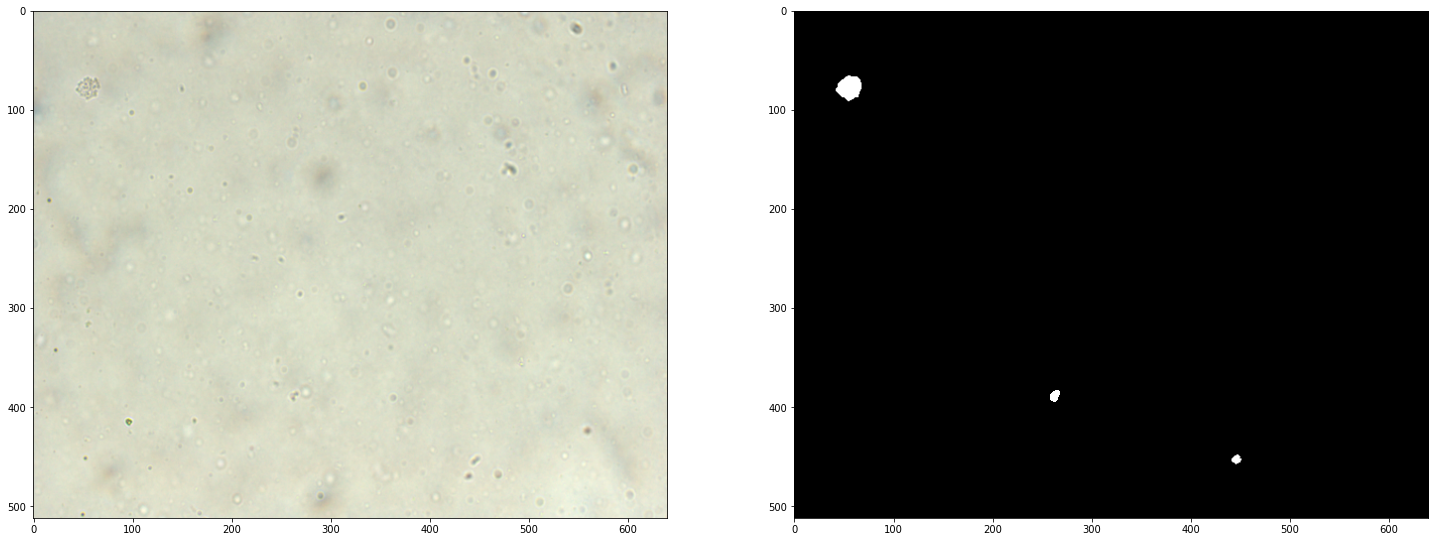

In [ ]:
x_batch = []

r_s = str(randint(1, 107)).zfill(3)
# r_s ='052'

print(sol_df.loc[sol_df['id'] == int(r_s)]['class'])
print(r_s)
img_name = '/content/drive/My Drive/Colab Notebooks/olymp/test/' + r_s + '.png'
img = cv2.UMat(cv2.imread(img_name, cv2.IMREAD_COLOR))
img = cv2.UMat.get(img)
x_batch += [img]
x_batch = np.array(x_batch) / 255.
print(x_batch.shape)
pred = model.predict(x_batch)
pred[pred > 0.5] = 1
pred[pred <= 0.5] = 0
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25, 25))
axes[0].imshow(x_batch[0])
axes[1].imshow(pred[0,...,0] > 0.1 , cmap= 'Greys_r')

In [ ]:
pred = model.predict(img.reshape(1,512, 640, 3)/255)

In [ ]:
pred[pred > 0.5] = 1
pred[pred <= 0.5] = 0
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25, 25))
axes[0].imshow(x_batch[0])
axes[1].imshow(pred[0,...,0] > 0.1 , cmap= 'Greys_r')

In [ ]:
np_ar = np.random.normal( size=(10,12,3)) * 255

In [ ]:
vis = np.zeros((384, 836), np.float32)
vis2 = cv2.cvtColor(np_ar.astype('uint8'), cv2.COLOR_BGR2HSV )

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
def viewImage(image, name_of_window):
    cv2_imshow(image)

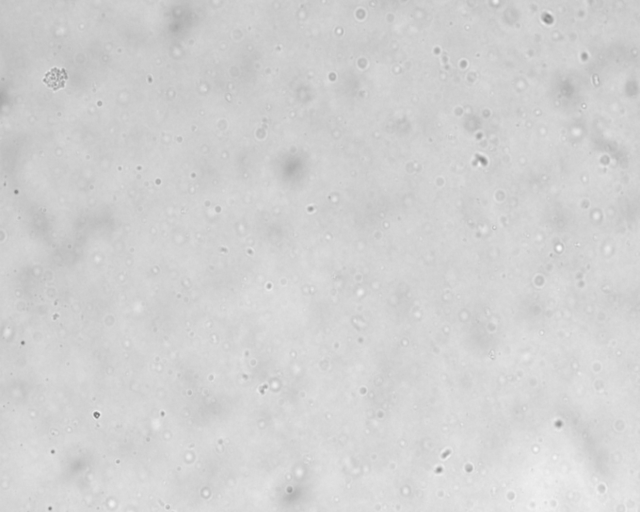

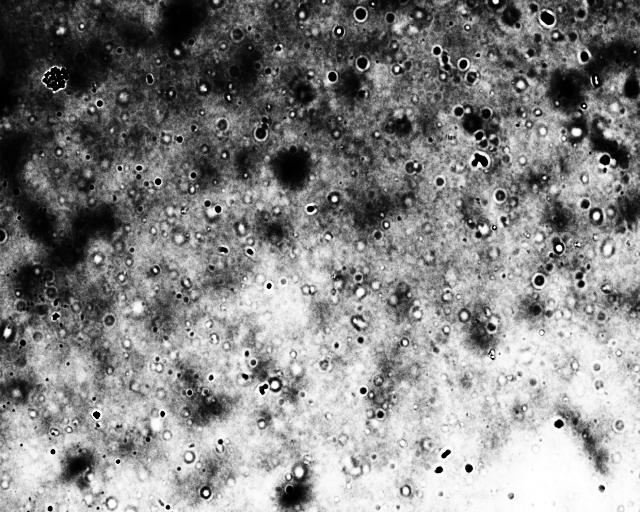

In [ ]:
# gray_image1 = cv2.cvtColor(laplacian, cv2.COLOR_BGR2GRAY) 
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
viewImage(gray_image, "Пёсик в градациях серого")
img = cv2.equalizeHist(gray_image)
viewImage(img, "Пёсик в градациях серого")
# viewImage(gray_image1, "Пёсик в градациях серого")

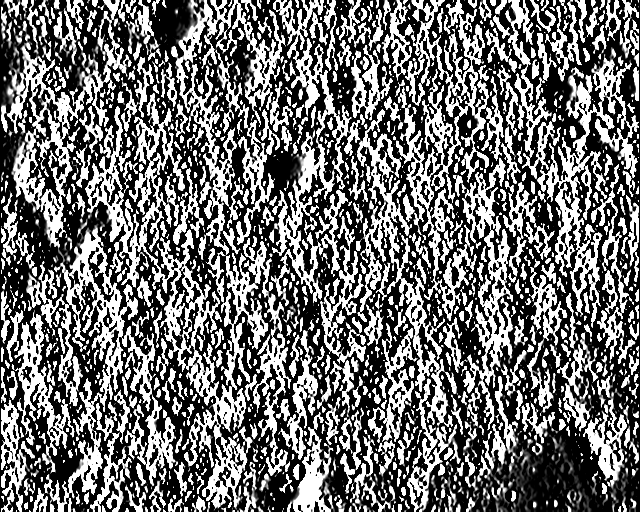

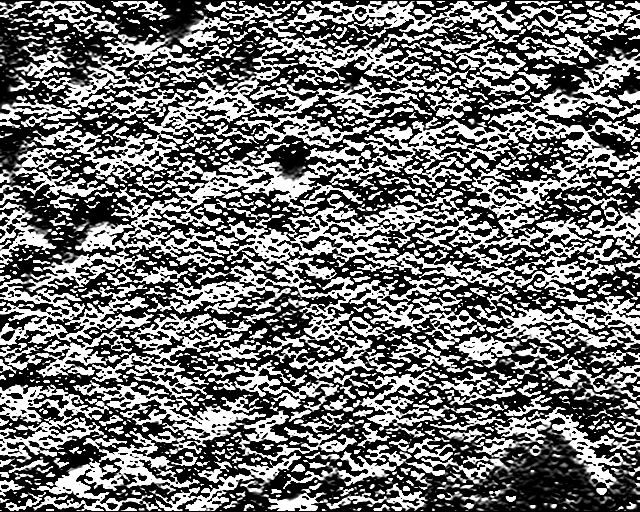

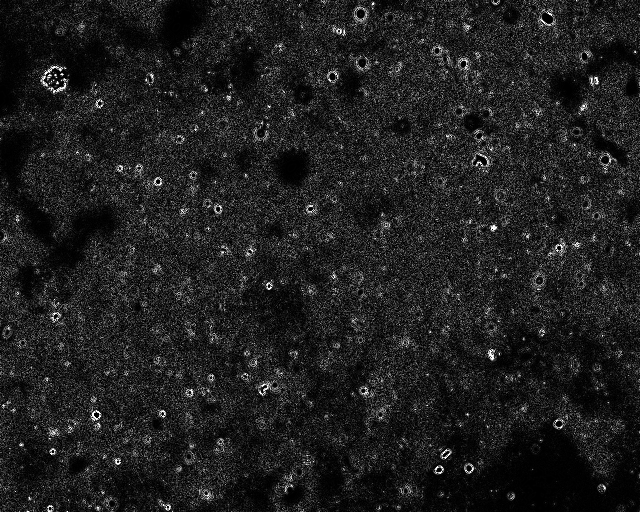

In [ ]:
  # Convert to HSV for simpler calculations 
  frame = img
  # hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV) 
    
  # Calcution of Sobelx 
  sobelx = cv2.Sobel(frame,cv2.CV_64F,1,0,ksize=5) 
    
  # Calculation of Sobely 
  sobely = cv2.Sobel(frame,cv2.CV_64F,0,1,ksize=5) 
    
  # Calculation of Laplacian 
  laplacian = cv2.Laplacian(frame,cv2.CV_64F) 
  laplacian = cv2.convertScaleAbs(laplacian)
  
  cv2_imshow(sobelx) 
  cv2_imshow(sobely) 
  cv2_imshow(laplacian) 

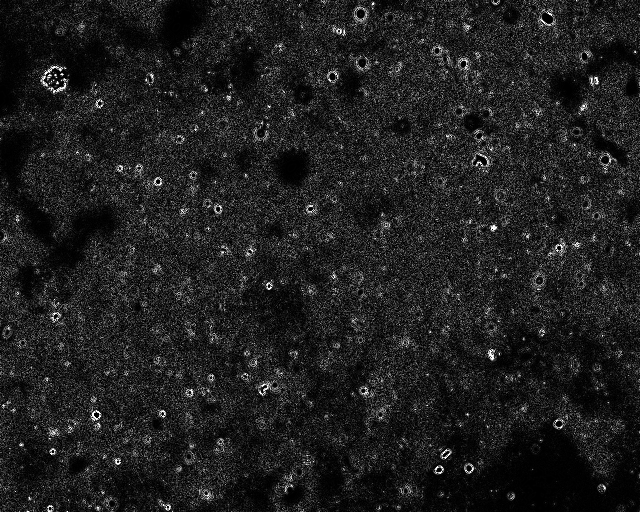

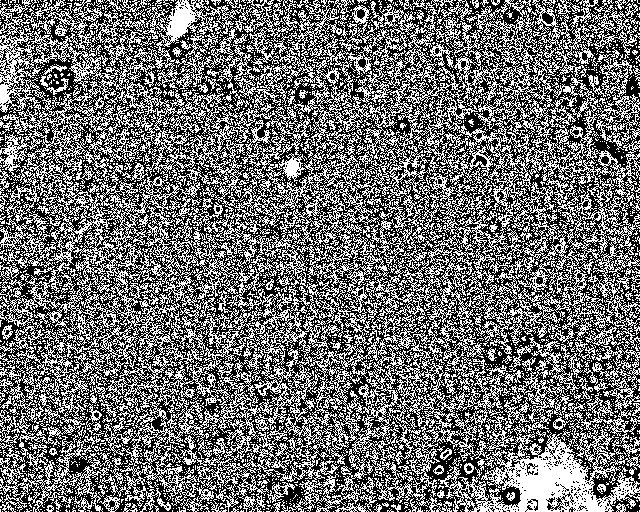

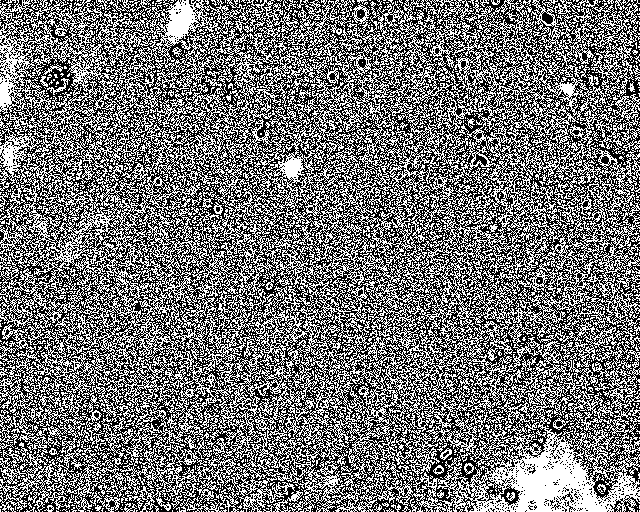

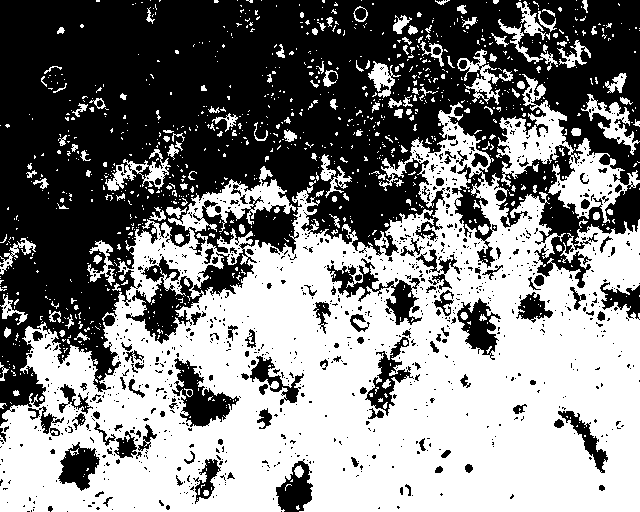

In [ ]:
# img = cv2.medianBlur(gray_image,5)
# img = gray_image
# img= cv2.medianBlur(cv2.cvtColor(laplacian, cv2.COLOR_BGR2GRAY),3)
img = laplacian
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)
ret, mask = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img,th2, th3, mask]
for i in range(4):
  viewImage(images[i], "Пёсик в градациях серого")


In [ ]:
np.min(laplacian)

-117.0

In [ ]:
# laplacian = cv2.convertScaleAbs(laplacian)
# viewImage(laplacian, "Пёсик в градациях серого")

In [ ]:
image_equalized = np.zeros((512,640,3))
image_equalized[:, :, 0] = img
image_equalized[:, :, 1] = pred[0,...,0] > 0.1
image_equalized[:, :, 2] = gray_image

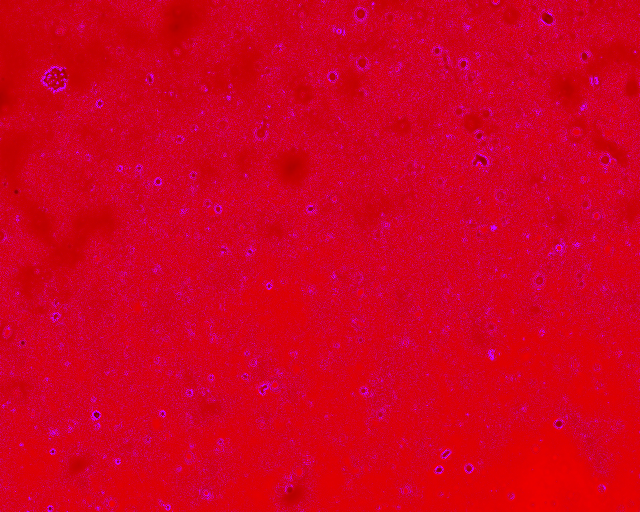

In [ ]:
# sobely = cv2.convertScaleAbs(sobely)
viewImage(image_equalized, "Пёсик в градациях серого")

In [ ]:
import albumentations as A

In [ ]:
aug = A.Compose([A.GridDistortion(p=0.3),
                  A.Flip(p=0.3),
                  A.ShiftScaleRotate(p=0.3),
                  A.GridDistortion(p=0.3),
                  A.Flip(p=0.3),
                  A.ShiftScaleRotate(p=0.3),
                  A.GridDistortion(p=0.3),
                  A.Flip(p=0.3),])

In [ ]:
from random import choice
from random import randint

In [ ]:
x_batch = []
y_batch = []
r_s = str(randint(1, 261)).zfill(3)
img_name = '/content/drive/My Drive/Colab Notebooks/olymp/train/' + r_s + '.png'
mask_name = '/content/drive/My Drive/Colab Notebooks/olymp/train_masks/' + r_s + '.png'
label = '/content/drive/My Drive/Colab Notebooks/olymp/train_with_json/' + r_s + '.json'

label = json.load(open(label))
label = label['shapes'][0]['label'] 
print(label)

img = cv2.UMat(cv2.imread(img_name, cv2.IMREAD_COLOR))
img = cv2.UMat.get(img)
masks = cv2.UMat(cv2.imread(mask_name, cv2.IMREAD_COLOR))
masks = cv2.UMat.get(masks)

x_batch += [img]
x_batch = np.array(x_batch) / 255.

pred = model.predict(x_batch)
pred[pred > 0.5] = 255
pred[pred <= 0.5] = 0

gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
gray_image_eq = cv2.equalizeHist(gray_image)
laplacian = cv2.Laplacian(gray_image_eq,cv2.CV_64F) 
laplacian = cv2.convertScaleAbs(laplacian)

image_equalized = np.zeros((512,640,3))
image_equalized[:, :, 0] = laplacian
image_equalized[:, :, 1] = pred[0,...,0]
image_equalized[:, :, 2] = gray_image


choice_aug1 = aug(image=image_equalized, mask= masks)
im = choice_aug1['image']
ma = choice_aug1['mask'][...,0]


moraxella_catarrhalis


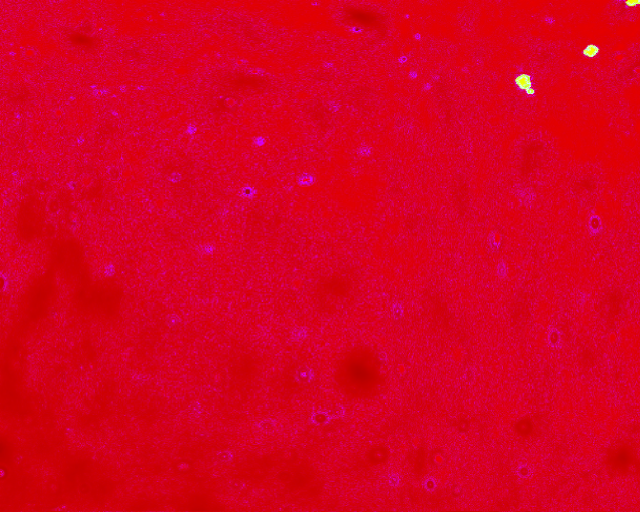

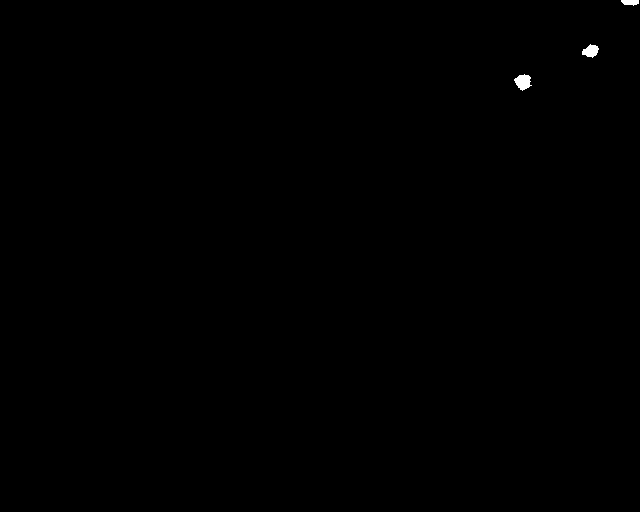

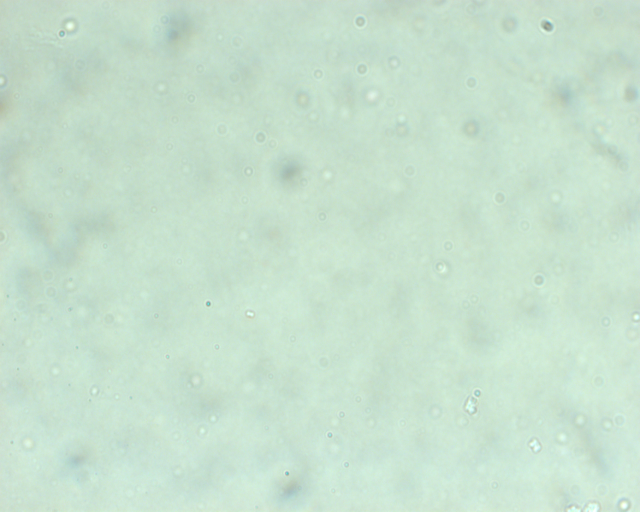

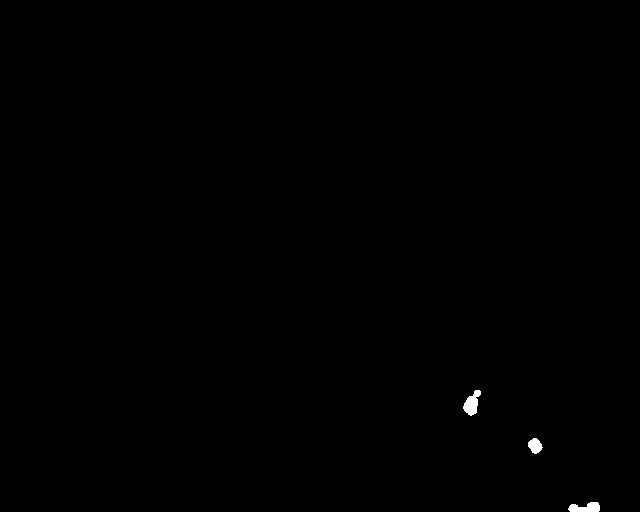

In [ ]:
viewImage(im, "1 в градациях серого")
viewImage(ma, "2 в градациях серого")
viewImage(img, "3 в градациях серого")
viewImage(pred[0,...,0], "4 в градациях серого")

# fig, axes = plt.subplots(figsize=(5, 5))
# axes.imshow(pred[0,...,0] , cmap= 'Greys_r')

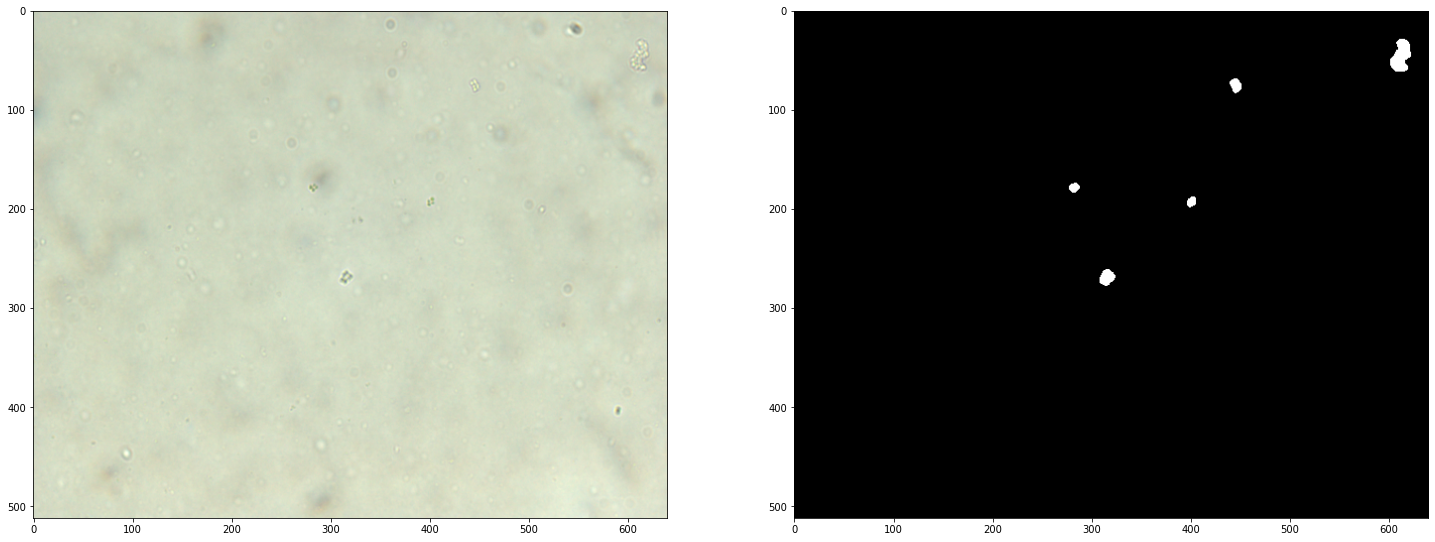

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25, 25))
axes[0].imshow(x_batch[0])
axes[1].imshow(pred[0,...,0] , cmap= 'Greys_r')

In [ ]:
k = pred[0,...,0]

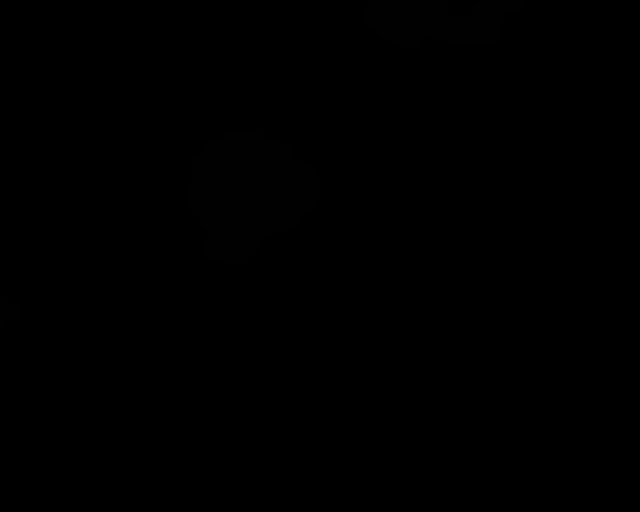

In [ ]:
viewImage(k, "Пёсик в градациях серого")

In [ ]:
np.max(image_equalized)

255.0